# Imports

In [1]:
import os
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from datasets import load_dataset, Image
from transformers import CLIPModel, CLIPProcessor

/home/fullldiesel/miniconda3/envs/mlx2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import torch
from torch.utils.data import Dataset, DataLoader

# Data

In [5]:
flickr = "nlphuji/flickr30k"

In [6]:
fli_ds = load_dataset(flickr)

In [49]:
fli_ds["test"][9]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x230>,
 'caption': ['Two men in Germany jumping over a rail at the same time without shirts.',
  'Two youths are jumping over a roadside railing, at night.',
  'Boys dancing on poles in the middle of the night.',
  'Two men with no shirts jumping over a rail.',
  'Two guys jumping over a gate together'],
 'sentids': ['45', '46', '47', '48', '49'],
 'split': 'train',
 'img_id': '9',
 'filename': '1001545525.jpg'}

In [103]:
type(fli_ds)

datasets.dataset_dict.DatasetDict

In [121]:
fli_ds["test"][3100:3105]["image"]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=427x320>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x451>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>]

In [104]:
img = fli_ds["test"][0]["image"]
captions = fli_ds["test"][0]["caption"]

In [122]:
dir(img)

['_Image__transformer',
 '__annotations__',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_close_fp',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_exif_offset',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_getmp',
 '_huffman_ac',
 '_huffman_dc',
 '_im',
 '_min_frame',
 '_mode',
 '_new',
 '_open',
 '_read_dpi_from_exif',
 '_reload_exif',
 '_repr_image',
 '_repr_jpeg_',
 '_repr_png_',
 '_repr_pretty_',
 '_seek_check',
 '_size',
 'alpha_composite',
 'app',
 'applist',
 'apply_transpa

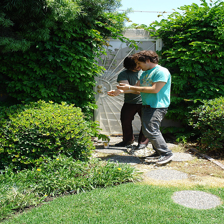

In [118]:
img.resize((224, 224))

In [99]:
captions

[['Two young guys with shaggy hair look at their hands while hanging out in the yard.',
  'Two young, White males are outside near many bushes.',
  'Two men in green shirts are standing in a yard.',
  'A man in a blue shirt standing in a garden.',
  'Two friends enjoy time spent together.'],
 ['Several men in hard hats are operating a giant pulley system.',
  'Workers look down from up above on a piece of equipment.',
  'Two men working on a machine wearing hard hats.',
  'Four men on top of a tall structure.',
  'Three men on a large rig.'],
 ['A child in a pink dress is climbing up a set of stairs in an entry way.',
  'A little girl in a pink dress going into a wooden cabin.',
  'A little girl climbing the stairs to her playhouse.',
  'A little girl climbing into a wooden playhouse.',
  'A girl going into a wooden building.'],
 ['Someone in a blue shirt and hat is standing on stair and leaning against a window.',
  'A man in a blue shirt is standing on a ladder cleaning a window.',
 

In [78]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

In [79]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [169]:
model.text_model.embeddings.token_embedding

Embedding(49408, 512)

In [173]:
processor

CLIPProcessor:
- image_processor: CLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

- tokenizer: CLIPTokenizerFast(name_or_path='openai/clip-vit-base-patch32', vocab_size=49408, model_max_length=77, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	49406: AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, spec

In [174]:
len(processor.tokenizer)

49408

In [171]:
model.vision_model

CLIPVisionTransformer(
  (embeddings): CLIPVisionEmbeddings(
    (patch_embedding): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (position_embedding): Embedding(50, 768)
  )
  (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (encoder): CLIPEncoder(
    (layers): ModuleList(
      (0-11): 12 x CLIPEncoderLayer(
        (self_attn): CLIPSdpaAttention(
          (k_proj): Linear(in_features=768, out_features=768, bias=True)
          (v_proj): Linear(in_features=768, out_features=768, bias=True)
          (q_proj): Linear(in_features=768, out_features=768, bias=True)
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): CLIPMLP(
          (activation_fn): QuickGELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
    

In [163]:
type(processor)

transformers.models.clip.processing_clip.CLIPProcessor

In [185]:
inp = processor(text=captions, images=img, padding=True, return_tensors="pt")
inp.keys()

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])

In [186]:
op = model(**inp)
op.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [191]:
_, i = op["logits_per_image"].topk(2)

In [201]:
captions[i.tolist()[0]]

TypeError: list indices must be integers or slices, not list

In [250]:
op["image_embeds"].squeeze().tolist()

[-0.0068685803562402725,
 0.03290710970759392,
 -0.00878952257335186,
 -0.04285396263003349,
 -0.00110356614459306,
 0.001864714315161109,
 0.04996149241924286,
 0.024585220962762833,
 0.0012732098111882806,
 -0.007449920289218426,
 0.022090787068009377,
 -0.0235744696110487,
 -0.10609575361013412,
 0.014871672727167606,
 -9.36107462621294e-05,
 -0.005559461656957865,
 -0.13383930921554565,
 0.017229599878191948,
 0.0035680453293025494,
 0.016101863235235214,
 0.06608162075281143,
 -0.010151403024792671,
 -0.009551772847771645,
 -0.01784190721809864,
 0.038331128656864166,
 -0.024819087237119675,
 0.0009879219578579068,
 0.011610826477408409,
 0.021788325160741806,
 -0.02901279553771019,
 -0.03913262113928795,
 0.009286673739552498,
 0.020069386810064316,
 -0.010194515809416771,
 0.06195051595568657,
 0.002361821476370096,
 -0.015590568073093891,
 0.021093104034662247,
 0.05367603898048401,
 -0.002724760677665472,
 -0.00510044302791357,
 0.015143224969506264,
 -0.018173260614275932,
 -

In [148]:
op["vision_model_output"]["last_hidden_state"].shape

torch.Size([1, 50, 768])

In [151]:
op

CLIPOutput(loss=None, logits_per_image=tensor([[32.6571, 31.0840, 32.8633, 29.8758, 24.8078]], grad_fn=<TBackward0>), logits_per_text=tensor([[32.6571],
        [31.0840],
        [32.8633],
        [29.8758],
        [24.8078]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 0.0236,  0.0257, -0.0517,  ...,  0.0277,  0.0091,  0.0277],
        [-0.0146,  0.0540,  0.0041,  ...,  0.0012, -0.0394, -0.0297],
        [ 0.0132,  0.0682, -0.0143,  ...,  0.0200, -0.0219,  0.0311],
        [-0.0003,  0.0705, -0.0038,  ..., -0.0250, -0.0333,  0.0180],
        [ 0.0135,  0.0129, -0.0342,  ..., -0.0290, -0.0145, -0.0069]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[-6.8686e-03,  3.2907e-02, -8.7895e-03, -4.2854e-02, -1.1036e-03,
          1.8647e-03,  4.9961e-02,  2.4585e-02,  1.2732e-03, -7.4499e-03,
          2.2091e-02, -2.3574e-02, -1.0610e-01,  1.4872e-02, -9.3611e-05,
         -5.5595e-03, -1.3384e-01,  1.7230e-02,  3.5680e-03,  1.6102e-02,
          6.6082e-02, -1.0151e-02, -9.551

In [251]:
inp = processor(text=captions, images=img, padding=True, size={"shortest_edge": 125}, return_tensors="pt").to("cpu")
tinp = processor(text=captions, padding=True, size={"shortest_edge": 125}, return_tensors="pt").to("cpu")
vinp = processor(images=img, padding=True, size={"shortest_edge": 125}, return_tensors="pt").to("cpu")

In [222]:
model.text_model(**tinp).keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [230]:
vinp.keys()

dict_keys(['pixel_values'])

In [260]:
imfeat = model(**inp).image_embeds.squeeze()

In [262]:
get_imfeat = model.get_image_features(**vinp).squeeze()

In [269]:
model.get_text_features

torch.Size([5, 512])

In [233]:
model.get_text_features(**tinp).shape

torch.Size([5, 512])

In [239]:
vals, indices = op.logits_per_image.topk(3)
indices

tensor([[2, 0, 1]])

In [242]:
for i in indices[0].tolist():
    print(i)

2
0
1


In [212]:
op.vision_model_output.pooler_output.shape

torch.Size([1, 768])

In [215]:
op.vision_model_output.last_hidden_state[:, 1:, :].shape

torch.Size([1, 49, 768])

In [203]:
type(inp)

transformers.tokenization_utils_base.BatchEncoding

In [202]:
op = model(**inp)
type(op)

transformers.models.clip.modeling_clip.CLIPOutput

In [ ]:
processor.tokenizer()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..2.145897].


(3, 224, 224)


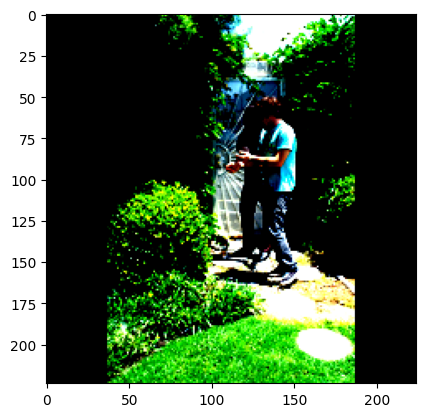

In [129]:
img_inputs = processor(images=img, pading=True, size={"shortest_edge": 150})
img_proc = img_inputs["pixel_values"][0]
print(img_proc.shape)
plt.imshow(img_inputs["pixel_values"][0].transpose(-2, -1, 0))

In [10]:
img = fli_ds["test"][0]["image"]
cap = fli_ds["test"][0]["caption"]

In [95]:
inputs = processor(text=cap, images=img, return_tensors="pt", padding=True)

In [96]:
output = model(**inputs)


In [99]:
output.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [101]:
output["logits_per_image"].shape

torch.Size([1, 5])

In [102]:
output["logits_per_text"].shape

torch.Size([5, 1])

In [111]:
vals, idxs = output["logits_per_image"].topk(2)
idxs

tensor([[2, 0]])

In [88]:
output = model.get_image_features(**inputs)

In [93]:
top_k = 1

In [ ]:
for row in fli_ds["test"][:100]:
    img = row["image"]
    captions = row["caption"]
    split = row["split"]

    

    

    

{'pixel_values': tensor([[[[-1.5441, -1.4565, -1.4857,  ..., -1.3981, -1.3689, -1.1207],
          [-1.5733, -1.4565, -1.5587,  ..., -1.3981, -1.3251, -0.9602],
          [-1.5587, -1.5441, -1.5003,  ..., -1.3105, -1.3105, -1.5733],
          ...,
          [-0.8580, -0.9456, -0.3470,  ...,  1.6968,  1.7260,  1.7114],
          [-0.1134,  0.0909,  0.6749,  ...,  1.7260,  1.6092,  1.7406],
          [-0.3470, -0.0405,  0.3537,  ...,  1.6092,  1.4924,  1.5216]],

         [[-1.1068, -1.0617, -1.1668,  ..., -0.4914, -0.4764, -0.4014],
          [-1.2118, -1.0617, -1.1968,  ..., -0.5215, -0.3264, -0.0712],
          [-1.1968, -1.1218, -1.1818,  ..., -0.4614, -0.5065, -0.8516],
          ...,
          [ 0.0488,  0.0638,  0.4390,  ...,  1.5796,  1.6997,  1.7147],
          [ 0.7542,  0.5891,  1.1444,  ...,  1.5646,  1.5046,  1.7747],
          [ 0.4390,  0.5441,  0.8743,  ...,  1.4596,  1.4896,  1.4295]],

         [[-1.1816, -1.0536, -1.1389,  ..., -1.3665, -1.3949, -1.1532],
          [-1

In [89]:
inputs["input_ids"].shape

KeyError: 'input_ids'

In [79]:
inputs["attention_mask"].shape

torch.Size([5, 19])

In [92]:
inputs["pixel_values"].shape

torch.Size([1, 3, 224, 224])

In [77]:
inputs["pixel_values"].shape

torch.Size([1, 3, 224, 224])

In [84]:
output

CLIPOutput(loss=None, logits_per_image=tensor([[32.6571, 31.0840, 32.8633, 29.8758, 24.8078]], grad_fn=<TBackward0>), logits_per_text=tensor([[32.6571],
        [31.0840],
        [32.8633],
        [29.8758],
        [24.8078]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 0.0236,  0.0257, -0.0517,  ...,  0.0277,  0.0091,  0.0277],
        [-0.0146,  0.0540,  0.0041,  ...,  0.0012, -0.0394, -0.0297],
        [ 0.0132,  0.0682, -0.0143,  ...,  0.0200, -0.0219,  0.0311],
        [-0.0003,  0.0705, -0.0038,  ..., -0.0250, -0.0333,  0.0180],
        [ 0.0135,  0.0129, -0.0342,  ..., -0.0290, -0.0145, -0.0069]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[-6.8686e-03,  3.2907e-02, -8.7895e-03, -4.2854e-02, -1.1036e-03,
          1.8647e-03,  4.9961e-02,  2.4585e-02,  1.2732e-03, -7.4499e-03,
          2.2091e-02, -2.3574e-02, -1.0610e-01,  1.4872e-02, -9.3611e-05,
         -5.5595e-03, -1.3384e-01,  1.7230e-02,  3.5680e-03,  1.6102e-02,
          6.6082e-02, -1.0151e-02, -9.551

In [ ]:


oo

In [283]:
from pathlib import Path
from typing import Any

import pandas as pd
import torch
from datasets import DatasetDict, load_dataset
from PIL.JpegImagePlugin import JpegImageFile
from tqdm.auto import tqdm
from transformers import CLIPModel, CLIPProcessor
from transformers.models.clip.modeling_clip import CLIPOutput
from transformers.tokenization_utils_base import BatchEncoding


def process_and_save_clip_embeddings(
    output_dir: Path | str,
    topk: int = 1,
    shortest_edge: int = 224,
    device: str = "cuda" if torch.cuda.is_available() else "cpu",
) -> None:
    """
    Process Flickr30k dataset and save CLIP embeddings with topk similar captions.

    Args:
        output_dir: Directory to save the processed dataset
        split: Dataset split ('train', 'test', 'validation')
        topk: Number of most similar captions to keep per image
        batch_size: Batch size for processing
        device: Device to use for computation
    """
    # Load CLIP model and processor
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)  # type: ignore
    processor: CLIPProcessor = CLIPProcessor.from_pretrained(
        "openai/clip-vit-base-patch32"
    )  # type: ignore

    # Load Flickr dataset
    flickr = load_dataset("nlphuji/flickr30k")
    dataset: DatasetDict = flickr["test"]  # type: ignore

    # Create output directory
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    # Prepare output file

    data_dict = {"train": [], "test": [], "val": []}

    # Process dataset in batches
    for row in tqdm(dataset, desc="Processing Dataset", total=len(dataset)):
        image: JpegImageFile = row["image"]
        captions: list[str] = row["caption"]
        split: str = row["split"]
        width, height = image.size
        image_id: int = int(row["img_id"])
        filename: str = row["filename"]

        # Pass the image & 5 captions to the CLIP Processor
        vision_input: BatchEncoding = processor(
            images=image, return_tensors="pt", size={"shortest_edge": shortest_edge}, padding=True
        )

        model_input: BatchEncoding = processor(
            text=captions,
            images=image,
            return_tensors="pt",
            size={"shortest_edge": shortest_edge},
            padding=True
        ).to(device)

        # Pass this input into CLIP to get outputs
        model_output: CLIPOutput = model(**model_input)

        # This obtains the CLS token for the image (batch_size, d_model=512)
        image_output = model.get_image_features(**vision_input).squeeze()  # type: ignore

        # We will now pick the top-k most similar captions
        vals, caption_indices = model_output["logits_per_image"].topk(k=topk)
        for idx in caption_indices[0].tolist():
            data_row = {
                "img_embedding": image_output.tolist(),
                "caption": captions[idx],
                "img_id": image_id,
                "filename": filename,
            }
            # Append the row to the data_list for the corresponding split
            data_dict[split].append(data_row)

    # Once done with making lists, create dataframes, save as parquet
    save_dataframe_parquet(
        data_dict=data_dict, topk=topk, split="train", output_dir=output_dir
    )
    save_dataframe_parquet(
        data_dict=data_dict, topk=topk, split="val", output_dir=output_dir
    )
    save_dataframe_parquet(
        data_dict=data_dict, topk=topk, split="test", output_dir=output_dir
    )


def save_dataframe_parquet(
    data_dict: dict[str, Any], topk: int, split: str, output_dir: Path | str
):
    df = pd.DataFrame(data_dict[split])
    filepath = Path(output_dir) / f"flickr_{split}_top{topk}.parquet"
    df.to_parquet(filepath)


In [284]:
!ls ..

configs  data  datafiles  model  notebooks  utils


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [285]:
output_dir = Path("../datafiles")

In [ ]:
process_and_save_clip_embeddings(output_dir, topk=1, shortest_edge=150)

Processing Dataset:   1%|▊                                                                                                                   | 222/31014 [01:02<2:21:36,  3.62it/s]